<h1><center>Final Assigment</center></h1>
<h3><center>Quim Bassa</center></h3>
This project aims to demonstrate the use of scikit in python using an eigenfaces exercise.<br>

First will construct a class for storing the information of the chamber of representatives. Later we will import the image dataset, compute some descriptive statistics, perform an analysis of principal components, clustering analysis and finally will use a non-linear classifier to assess the gender from just the image of the representative. 

Diputado Class
-----
A diputado has a Name, Surnames, ID, Picture, Gender and Political Affiliation
       

In [1]:
%pylab inline
class Diputado(object):
    def __init__(self,ind,fileRoot="./"):
        self.name=""
        self.surname=""
        self.ind=ind
        self.picfile=""
        self.party=""
        self.gender=""
        self.fileRoot=fileRoot
        self.ext="c.jpg" 
    def setName(self,name):
        self.name=name
    def setSurname(self,surname):
        self.surname=surname
    def setParty(self,party):
        self.party=party
    def setGender(self,gender):
        self.gender=gender
    def getName(self):
        return self.name
    def getSurname(self):
        return self.surname
    def getInd(self):
        return self.ind
    def getPicfile(self):
        return self.fileRoot + str(self.ind) + self.ext
    def getParty(self):
        return self.party
    def getGender(self):
        return self.gender
       

Populating the interactive namespace from numpy and matplotlib


In [2]:
class Parlament(object):
    def __init__(self):
        self.elements=[]
        self.inds=[]
        self.ndips=0
    def add(self, diputado):
        self.elements.append(diputado)
        self.inds.append(diputado.getInd())
        self.ndips +=1
    def getInds(self):
        return [self.elements[i].getInd() for i in range(self.ndips)]
    def len(self):
        return len(self.elements)
    def __getitem__(self, key):
        if isinstance(key, slice):
            indices = key.indices(self.ndips)
            return [self[ii] for ii in xrange(*key.indices(self.len()))] 
        else:
            return self.elements[key]
    def getName(self,key):
        return self.elements[key].getName()
        

In [3]:
import csv
with open('C:/Users/bassa/Documents/MESIO/2Q/Python/Final project/db/Lab Database/index.csv','r',encoding='utf-8') as csvfile:
    r = csv.reader(csvfile, delimiter=';')
    r.__next__()
    p = Parlament()
    for row in r:
        n = Diputado(int(row[0]),"C:/Users/bassa/Documents/MESIO/2Q/Python/Final project/db/Lab Database/db/")
        n.setName(row[1].strip())
        n.setSurname(row[2].strip())
        n.setGender(row[3].strip())
        n.setParty(row[4].strip())
        p.add(n)


In [4]:
p.len()
p[99].getPicfile()

'C:/Users/bassa/Documents/MESIO/2Q/Python/Final project/db/Lab Database/db/91c.jpg'

Let's create a dataset of the analysis

'Joan|Tardà i Coma|H'

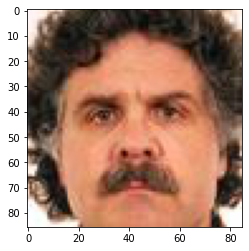

In [5]:
from scipy import ndimage,misc
import numpy as np
import matplotlib.pyplot as pl
idip = 129
I = pl.imread(p[idip].getPicfile())
pl.imshow(I)
np.shape(I)
'|'.join([p[idip].getName(), p[idip].getSurname(), p[idip].getGender()])

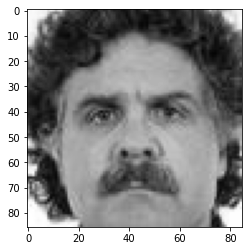

In [6]:
I = pl.imread(p[idip].getPicfile()).mean(axis=2)
img=pl.imshow(I)
img.set_cmap('gray')
Is=shape(I)


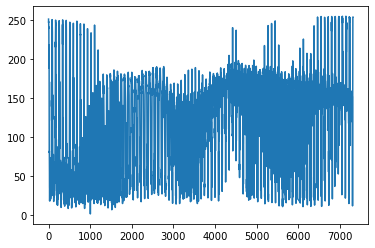

In [7]:
Iv = np.reshape(I,np.prod(Is))
pl.plot(Iv)

Let's stack all images to an array and create a couple of dependent variables

In [8]:
X=np.array([ pl.imread(d.getPicfile()).mean(axis=2).ravel()
             for d in p])
shape(X)
Yg=np.array([ d.getGender() for d in p])
Yp=np.array([ d.getParty() for d in p])
Yp[0:5],Yg[0:5],shape(X)

(array(['GS', 'GS', 'GC-CiU', 'GP', 'GP'], dtype='<U10'),
 array(['H', 'M', 'H', 'H', 'H'], dtype='<U1'),
 (348, 7310))

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


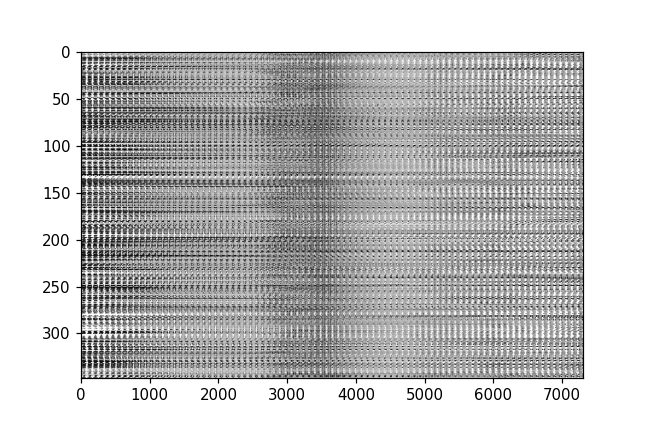

In [49]:
%pylab notebook 
pl.imshow(X,aspect='auto')
pl.set_cmap('gray')

### **1. Compute the mean representative and plot the image corresponding to the mean representative (dataset provided below)**

In [10]:
#We check the dimension of the dataset
X.shape


(348, 7310)

In [11]:
#We compute the mean through the columns of the dataset 
mX=X.mean(axis=0)
mX.shape

(7310,)

In [12]:
#We reshape the vector of mean columns with the shape of the image defined previously
mX.reshape(Is).shape 

(86, 85)

<IPython.core.display.Javascript object>


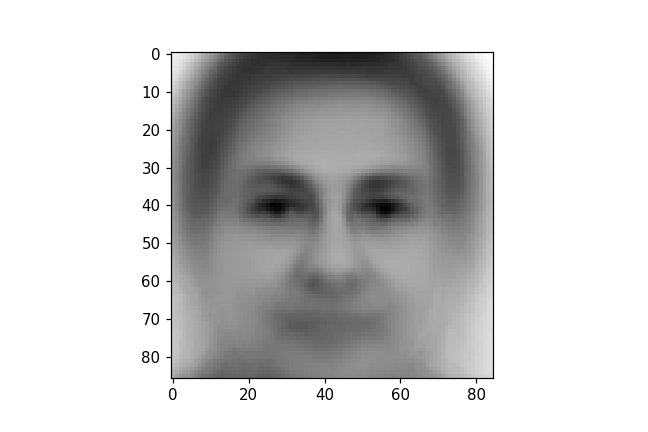

In [13]:
import pylab as pl
pl.figure()
pl.imshow(mX.reshape(Is))

This image stands for the mean face of all members of the Chamber of Representatives.
<br>
<br>

### **2.Compute the standard deviation and plot the corresponding image**

We follow the same precedure as the last exercise, but now applying the standard deviation method.

In [14]:
#We compute the standard deviation through the columns of the dataset 
sX=X.std(axis=0)
sX.shape

(7310,)

<IPython.core.display.Javascript object>


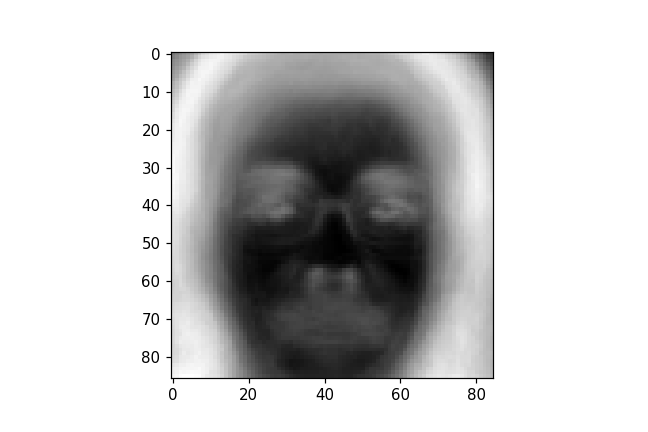

In [48]:
#We reshape the vector obtained into a matrix form and plot the imatge
import pylab as pl
pl.figure()
pl.imshow(sX.reshape(Is))

From the image obtained we can clearly deduce which face features have more variance.<br>

In statistics, the standard deviation is a measure of the amount of dispersion form the mean. A low standard deviation indicates that the values tend to be close to the mean, while a high standard deviation indicates that the values are spread out over a wider range.<br>

Therefore the black parts show that face characteristics that don't differ a lot between all the members, whilst the white parts, as the hair, eyes, or mouth indicate the features that for every person changes.
<br>
<br>

### **3. Run a k-means clustering and split the representatives' data into 10 groups. Plot the full set of images for two groups of your choice.**

In [16]:
#By the K Means algorithm, we split up the data in 10 clusters.
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=10)
k_means.fit(X)


KMeans(n_clusters=10)

In [17]:
#We check the cluster assigment for each observation
labels=k_means.labels_
labels

array([5, 7, 5, 3, 5, 3, 3, 6, 4, 0, 6, 2, 9, 5, 5, 6, 8, 5, 1, 7, 6, 5,
       9, 5, 6, 5, 9, 0, 0, 6, 4, 5, 0, 8, 8, 9, 3, 0, 9, 9, 9, 5, 3, 5,
       4, 0, 5, 0, 0, 5, 7, 2, 5, 9, 5, 0, 3, 9, 5, 5, 4, 7, 5, 9, 5, 4,
       4, 8, 9, 9, 3, 5, 9, 7, 7, 7, 6, 1, 7, 9, 6, 4, 5, 7, 5, 9, 5, 0,
       3, 3, 3, 5, 6, 1, 2, 6, 7, 9, 2, 8, 1, 7, 2, 8, 8, 4, 2, 0, 3, 4,
       5, 1, 3, 4, 8, 9, 5, 3, 9, 5, 5, 0, 5, 9, 8, 6, 9, 2, 0, 4, 0, 1,
       9, 2, 2, 5, 5, 1, 9, 4, 8, 4, 1, 6, 8, 2, 0, 5, 5, 5, 6, 3, 9, 5,
       0, 2, 1, 7, 5, 5, 9, 8, 5, 5, 9, 6, 1, 5, 5, 6, 4, 4, 0, 5, 3, 2,
       0, 2, 0, 2, 9, 4, 5, 3, 6, 8, 6, 9, 9, 0, 6, 7, 0, 7, 7, 2, 0, 5,
       4, 7, 8, 9, 1, 8, 6, 8, 7, 8, 8, 8, 6, 5, 1, 1, 9, 8, 0, 8, 1, 9,
       2, 8, 1, 6, 5, 3, 4, 6, 9, 2, 6, 8, 9, 5, 5, 2, 2, 8, 1, 5, 1, 7,
       0, 9, 2, 7, 6, 8, 5, 1, 9, 9, 9, 8, 6, 7, 6, 9, 6, 2, 8, 3, 9, 1,
       5, 6, 2, 8, 2, 1, 0, 1, 7, 8, 5, 7, 8, 5, 2, 2, 2, 3, 4, 8, 9, 7,
       3, 2, 8, 2, 4, 2, 5, 2, 2, 2, 2, 2, 0, 0, 8,

In [18]:
#We create a vector with the index of the observations of cluster 1 and 0
cluster_0=[index for index,value in enumerate(labels) if value==0]
cluster_1=[index for index,value in enumerate(labels) if value==1]


Once we have indetified which observtaions belong to cluster 0 and 1, we can proceed to plot all the images of the members of this subgroups.

In [19]:
#We filter the original matrix with the vector of observations that belongs to cluster 0.
#The vector obtained is reshaped into the matrix form needed to be plotted.
c0=X[cluster_0].reshape((len(cluster_0),Is[0],Is[1]))
c0.shape

(31, 86, 85)

<IPython.core.display.Javascript object>


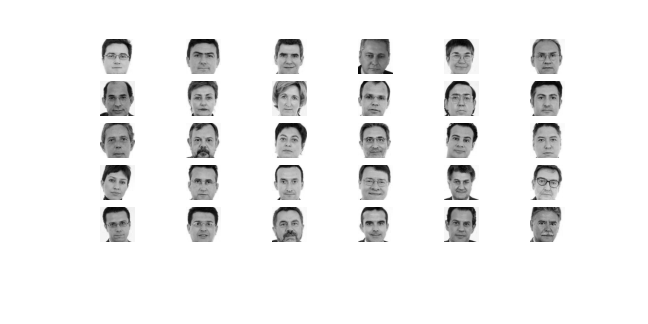

In [43]:
#We obtain a figure with the 31 member faces that belongs to cluster 0.
pl.figure(figsize=(6,3))

for i in range(1,31):
    pl.subplot(6,6,i)
    pl.imshow(c0[i])
    pl.axis('off')
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

pl.show()


In [45]:
#We filter the original matrix with the vector of observations that belongs to cluster 1.
#The vector obtained is reshaped into the matrix form needed to be plotted.
c1=X[cluster_1].reshape((len(cluster_1),Is[0],Is[1]))
c1.shape

(25, 86, 85)

<IPython.core.display.Javascript object>


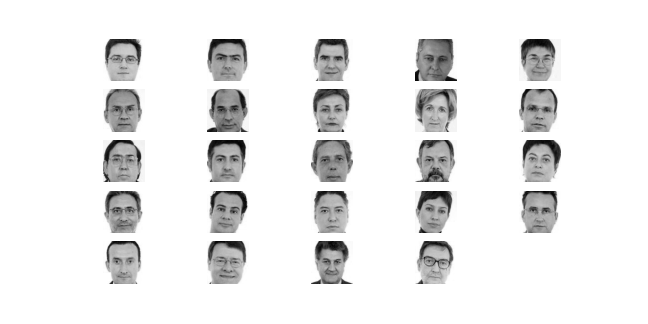

In [47]:
#We obtain a figure with the 25 member faces that belongs to cluster 0.
pl.figure(figsize=(6,3))

for i in range(1,25):
    pl.subplot(5,5,i)
    pl.imshow(c0[i])
    pl.axis('off')
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

pl.show()

<br>


### **4. Plot the centroid corresponding to each k-means cluster (10 images corresponding to the mean of each cluster)**